# Customer Segmentation - Ecommerce Dataset

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [107]:
pd.set_option('display.max_rows', 500)

## Data Preparation

In [3]:
df_initial = pd.read_csv("../datasets/customer-segmentation/data.csv", 
                         encoding="ISO-8859-1", dtype={"CustomerID": str, "InvoiceID": str})
print(f"Shape of the dataframe: {df_initial.shape}")

Shape of the dataframe: (541909, 8)


In [ ]:
# Check out the dataframe
df_initial.head(500)

There are almost 542K entries in the dataset.

In [4]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


In [5]:
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])

In [7]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [25]:
tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: "Column Type"})
tab_info = pd.concat([tab_info, pd.DataFrame(df_initial.isna().sum()).T.rename(index={0: "Null Entry"})])
tab_info = pd.concat([tab_info, pd.DataFrame(df_initial.isna().sum() / df_initial.shape[0] * 100).T.rename(index={0: "Null Entry(%)"})])

In [26]:
tab_info

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,datetime64[ns],float64,object,object
Null Entry,0,0,1454,0,0,0,135080,0
Null Entry(%),0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0


In [30]:
df_initial = df_initial.dropna(axis=0, subset=['CustomerID'])

print(f"Shape of the dataframe after dropping NA rows: {df_initial.shape}")

tab_info = pd.DataFrame(df_initial.dtypes).T.rename(index={0: "Column Type"})
tab_info = pd.concat([tab_info, pd.DataFrame(df_initial.isna().sum()).T.rename(index={0: "Null Entry"})])
tab_info = pd.concat([tab_info, pd.DataFrame(df_initial.isna().sum() / df_initial.shape[0] * 100).T.rename(index={0: "Null Entry(%)"})])

display(tab_info)

Shape of the dataframe after dropping NA rows: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
Column Type,object,object,object,int64,datetime64[ns],float64,object,object
Null Entry,0,0,0,0,0,0,0,0
Null Entry(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Exploration

### 1. Countries

In [32]:
num_countries = df_initial['Country'].nunique()
countries = df_initial['Country'].unique()

print(f"Number of unique countries present: {num_countries}")
print(f"Countries present in the dataset: {countries}")

Number of unique countries present: 37
Countries present in the dataset: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']


In [83]:
# Count no of transactions happened in each country
temp = pd.DataFrame(df_initial['Country'].value_counts()).rename(columns={"count": "Transactions Count"})
# Count percentage contribution of each country in terms of transactions
temp = temp.join(pd.DataFrame(df_initial['Country'].value_counts() / df_initial.shape[0] * 100).rename(columns={"count": "Transactions Count(%)"}))
# Count no of customers from each country
temp = temp.join(df_initial[['CustomerID', 'Country']].groupby(['Country']).count()).rename(columns={'CustomerID': 'NB_Customers'})
# Count no of invoices generated in each country
temp = temp.join(df_initial[['InvoiceNo', 'Country']].groupby(['Country']).count()).rename(columns={'InvoiceNo': 'NB_Invoices'})

display(temp[:5])

,Transactions Count,Transactions Count(%),NB_Customers,NB_Invoices
Country,,,,
United Kingdom,361878,88.950886,361878,361878
Germany,9495,2.333904,9495,9495
France,8491,2.087118,8491,8491
EIRE,7485,1.839839,7485,7485
Spain,2533,0.622620,2533,2533


In [82]:
countries = temp['Transactions Count']

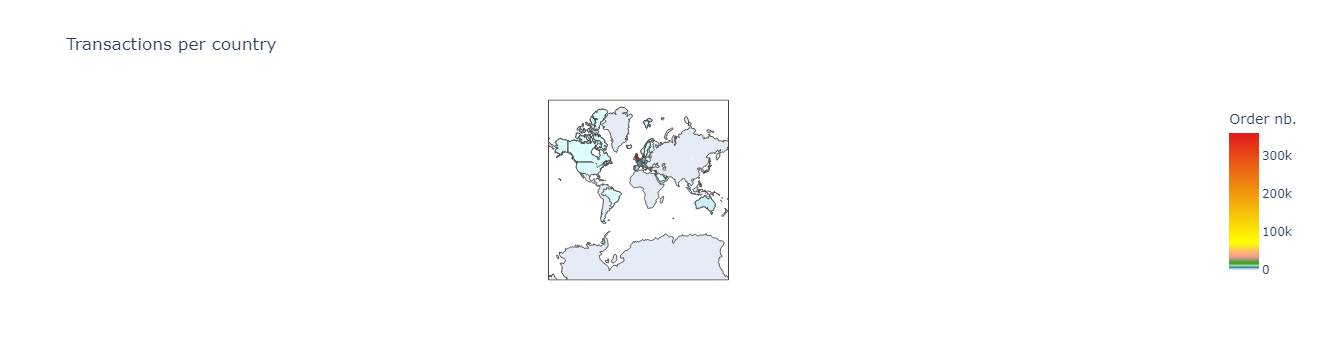

In [81]:
data = dict(type='choropleth', 
           locations=countries.index, locationmode='country names', 
           z=countries, colorbar={'title': 'Order nb.'}, 
           colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']], 
           reversescale=False)
layout = dict(title="Transactions per country", 
             geo=dict(showframe=True, projection={'type':'mercator'}))
choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)

### 2. Customer and Product

In [88]:
pd.DataFrame([{'Customers': df_initial['CustomerID'].nunique(), 
             'Transactions': df_initial['InvoiceNo'].nunique(), 
             'Products': df_initial['StockCode'].nunique()}], columns=['Customers', 'Transactions', 'Products'], 
             index=["Quantity"])

,Customers,Transactions,Products
Quantity,4372,22190,3684


In [102]:
products_per_basket = pd.DataFrame(df_initial.groupby(['InvoiceNo', 'CustomerID'])['InvoiceDate'].count()).reset_index(drop=False).rename(columns={'InvoiceDate': 'Number of Products'})
products_per_basket[:10].sort_values('CustomerID')

,InvoiceNo,CustomerID,Number of Products
5,536370,12583,20
2,536367,13047,12
3,536368,13047,4
4,536369,13047,1
6,536371,13748,1
9,536374,15100,1
0,536365,17850,7
1,536366,17850,2
7,536372,17850,2
8,536373,17850,16


In [99]:
products_per_basket['cancelled order'] = products_per_basket['CustomerID'].apply(lambda x: int('C' in x))
products_per_basket[:5].sort_values('CustomerID')

,InvoiceNo,CustomerID,Number of Products,cancelled order
2,536367,13047,12,0
3,536368,13047,4,0
4,536369,13047,1,0
0,536365,17850,7,0
1,536366,17850,2,0
